In [1]:
# ---------------------- RANDOM FOREST CLASSIFIER (Simple Explanation) ----------------------
# Random Forest is a supervised ensemble learning algorithm.
# It builds many decision trees and combines their predictions.
# Each tree sees a random subset of data and features, which makes the model:
# - more accurate
# - more stable
# - less likely to overfit than a single decision tree.

# ---------------------- 1. IMPORT REQUIRED LIBRARIES ----------------------

import pandas as pd                      # For data loading and handling
import numpy as np                       # For numerical operations
import matplotlib.pyplot as plt          # For creating plots
import seaborn as sns                    # For nicer visualizations

from sklearn.model_selection import train_test_split          # Split data into train and test sets
from sklearn.preprocessing import LabelEncoder                # Encode text labels as numbers
from sklearn.ensemble import RandomForestClassifier           # Random Forest classification model
from sklearn.metrics import (
    accuracy_score,                                           # Overall accuracy
    classification_report,                                    # Precision, recall, f1-score
    confusion_matrix                                          # Matrix of correct vs incorrect predictions
)


In [2]:
# ---------------------- 2. LOAD THE DATASET ----------------------
# Replacing local Windows path with a Kaggle dataset link:
# Kaggle Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

df = pd.read_csv("Telco-Customer-Churn.csv")   # Load the Telco Customer Churn dataset
df.head()                                      # Show first 5 rows


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# ---------------------- 3. CHECK BASIC DATA INFORMATION ----------------------
# .shape       → shows number of rows and columns
# .columns     → lists all column names
# .info()      → shows data types + whether columns have missing values

print("Shape of data (rows, columns):", df.shape)
print("\nColumn names:\n", df.columns.tolist())

print("\nData types and missing values:")
print(df.info())


Shape of data (rows, columns): (7043, 21)

Column names:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   Inte

In [4]:
# ---------------------- 4. CLEAN DATA (HANDLE 'TotalCharges') ----------------------
# In this dataset, 'TotalCharges' contains some non-numeric values stored as text.
# pd.to_numeric(..., errors='coerce') converts invalid values to NaN.
# Then we remove rows where TotalCharges became NaN.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')   # Convert to numeric

print(df.isnull().sum())                      # Check how many missing values exist

df = df.dropna(subset=['TotalCharges'])       # Drop rows with missing TotalCharges

print("\nShape after dropping missing rows:", df.shape)


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Shape after dropping missing rows: (7032, 21)


In [5]:
# ---------------------- 5. PREPARE DATA (DROP ID + ENCODE CATEGORICAL FEATURES) ----------------------
# 'customerID' is just an identifier → does not help the model, so we drop it.
# Many columns are categorical (Yes/No, Male/Female, Internet type, etc.).
# LabelEncoder converts these categories into numeric values.

# 6. Drop customerID (identifier, not a feature)
df = df.drop('customerID', axis=1)

# 7. Encode all categorical columns
label_encoders = {}                                      # Store encoders for later use
for col in df.columns:
    if df[col].dtype == 'object':                        # Check if column is text/categorical
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])              # Convert categories → numbers
        label_encoders[col] = le                         # Save encoder for future decoding

df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [6]:
# ---------------------- 6. SPLIT DATA INTO FEATURES AND TARGET ----------------------
# X = all customer attributes except 'Churn'
# y = whether the customer churned (0 = No, 1 = Yes)
# stratify=y keeps churn ratio consistent in both train/test sets.

X = df.drop('Churn', axis=1)   # Features
y = df['Churn']                # Target label

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2, 
    random_state=42,
    stratify=y               # Maintain churn distribution
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (5625, 19)
Test set shape: (1407, 19)


In [7]:
# ---------------------- 7. TRAIN RANDOM FOREST CLASSIFIER ----------------------
# n_estimators = number of trees in the forest (more trees → more stable predictions)
# max_depth=None lets each tree grow fully (can be tuned later)
# n_jobs=-1 uses all available CPU cores for faster training

rf_model = RandomForestClassifier(
    n_estimators=200,      # Build 200 trees
    random_state=42,       # For reproducible results
    max_depth=None,        # Allow trees to grow fully
    n_jobs=-1              # Use all CPU cores
)

rf_model.fit(X_train, y_train)   # Train the model


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

Accuracy on test set: 0.787

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



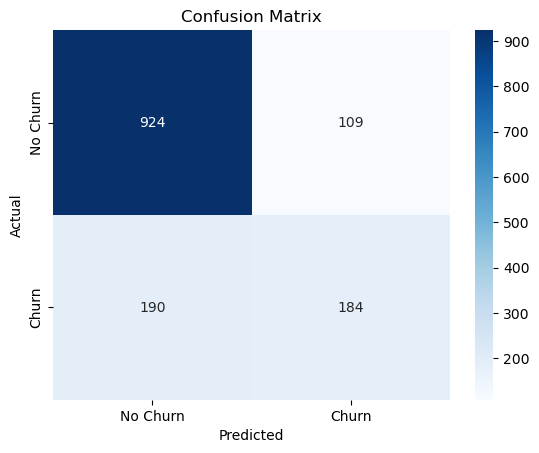

In [8]:
# ---------------------- 8. PREDICT & EVALUATE MODEL ----------------------

# Predict churn on test data
y_pred = rf_model.predict(X_test)

# Accuracy + detailed metrics
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {acc:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=['No Churn', 'Churn'],
    yticklabels=['No Churn', 'Churn']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# ---------------------- 9. FEATURE IMPORTANCE ----------------------
# Random Forest tells us which features were most helpful for predicting churn.
# Higher importance values = bigger impact on the model's decisions.

importances = rf_model.feature_importances_   # Importance for each feature
feature_names = X.columns                     # Feature names

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)   # Sort by importance

feat_imp.head(10)                                # Show top 10 features


,Feature,Importance
18,TotalCharges,0.185379
17,MonthlyCharges,0.176604
4,tenure,0.160264
14,Contract,0.081759
16,PaymentMethod,0.049956
8,OnlineSecurity,0.048717
11,TechSupport,0.039460
7,InternetService,0.029103
0,gender,0.028242
9,OnlineBackup,0.027947


In [10]:
# ---------------------- 10. INFERENCE ON A NEW CUSTOMER ----------------------
# We provide a new customer's details using original text values.
# These must be encoded using the same LabelEncoders used during training.

new_customer_raw = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 5,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 85.5,
    'TotalCharges': 400.0
}


In [11]:
# ---------------------- 11. PREPROCESS NEW CUSTOMER (MATCH TRAINING FORMAT) ----------------------
# Convert dictionary → DataFrame
# Reorder columns to match training data
# Apply the SAME label encoders used during training.

new_customer_df = pd.DataFrame([new_customer_raw])    # Create DataFrame

new_customer_df = new_customer_df[X.columns]          # Match column order

# Encode categorical columns using stored label encoders
for col in new_customer_df.columns:
    if col in label_encoders:                         # Only encode columns that used LabelEncoder
        le = label_encoders[col]
        new_customer_df[col] = le.transform(new_customer_df[col])

new_customer_df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,5,1,0,1,0,0,0,0,2,2,0,1,2,85.5,400.0


In [12]:
# ---------------------- 12. PREDICT CHURN FOR NEW CUSTOMER ----------------------
# predict() → gives class: 0 = No Churn, 1 = Churn
# predict_proba() → gives probability of each class (we take class 1 probability)

churn_pred = rf_model.predict(new_customer_df)[0]          # Predict class
churn_prob = rf_model.predict_proba(new_customer_df)[0][1] # Probability of churn (class 1)

print("Predicted class (0 = No Churn, 1 = Churn):", churn_pred)
print(f"Predicted probability of Churn: {churn_prob:.3f}")


Predicted class (0 = No Churn, 1 = Churn): 1
Predicted probability of Churn: 0.870
